In [8]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types

Welcome to JupyROOT 6.26/04


In [14]:
base_file_loc = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_pre_sel_240307_treefit/'
base_file_loc = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_pre_sel_240310_treefit/'
base_file_loc = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v1_240405_treefit_BCS_etapi0const/'
base_file_loc = '/share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_tight_v3_241014/etaeta_gpi_tag/'

In [15]:
generic_ccbar = base_file_loc + '*ccbar*.root'
generic_uubar = base_file_loc + '*uubar*.root'
generic_ddbar = base_file_loc + '*ddbar*.root'
generic_ssbar = base_file_loc + '*ssbar*.root'
generic_charged = base_file_loc + '*charged*.root'
generic_mixed = base_file_loc + '*mixed*.root'
generic_taupair = base_file_loc + '*taupair*.root'

In [16]:
base_filter='D0_M>0'
# base_filter='etaeta_gpi_rank==1'


In [17]:
tree = 'etaeta_gpi_tag'
variables = ["__experiment__", "__run__", "__event__",\
             "D0_M","D0_isSignal","Dstarp_delM","Dstarp_CMS_p","Dstarp_isSignal",\
             "Dstarp_cosAngleBetweenMomentumAndVertexVector","Dstarp_cosAngleBetweenMomentumAndVertexVectorInXYPlane",\
             "D0_cosAngleBetweenMomentumAndVertexVector","D0_cosAngleBetweenMomentumAndVertexVectorInXYPlane",\
             "Eta_1_isSignal", "Eta_1_M","Eta_1_p","Eta_1_daughterDiffOfPhi_0_1","Eta_1_daughterAngle_0_1","Eta_1_isSignal",\
             "Eta_2_isSignal", "Eta_2_M","Eta_2_p","Eta_2_isSignal",\
             "gamma1_E","gamma1_clusterNHits","gamma1_clusterReg",\
             "gamma2_E","gamma2_clusterNHits","gamma2_clusterReg",\
             "dM_pi0","ROE_Mgg",'veto_isSignal',\
             "dM_pi0_50MeV","ROE_Mgg_50MeV",'veto_isSignal_50MeV',\
             "dM_pi0_75MeV","ROE_Mgg_75MeV",'veto_isSignal_75MeV',\
             "dM_pi0_75MeV_2","ROE_Mgg_75MeV_2",'veto_isSignal_75MeV_2',\
             "Pis_dr","Pis_dz",\
             "gpi_eta_pi0_g1_E", "gpi_eta_pi0_g1_clusterReg",\
             "gpi_eta_pi0_g2_E", "gpi_eta_pi0_g2_clusterReg",\
             "gpi_eta_Pi0_M","gpi_eta_Pi0_daughterDiffOfPhi_0_1","gpi_eta_Pi0_daughterAngle_0_1","gpi_eta_Pi0_Easym"
            ]

variables = ["D0_M","__experiment__", "__run__", "__event__","__production__"]

In [18]:
pd_ccbar_0 = get_pd(file=generic_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_uubar_0 = get_pd(file=generic_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_ddbar_0 = get_pd(file=generic_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_ssbar_0 = get_pd(file=generic_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_charged_0 = get_pd(file=generic_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_mixed_0 = get_pd(file=generic_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_taupair_0 = get_pd(file=generic_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [19]:
pd_ccbar = pd_ccbar_0.reset_index(drop=True)
pd_uubar = pd_uubar_0.reset_index(drop=True)
pd_ddbar = pd_ddbar_0.reset_index(drop=True)
pd_ssbar = pd_ssbar_0.reset_index(drop=True)
pd_charged = pd_charged_0.reset_index(drop=True)
pd_mixed = pd_mixed_0.reset_index(drop=True)
pd_taupair = pd_taupair_0.reset_index(drop=True)

In [20]:
numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__","__production__"]].drop_duplicates()) + \
            len(pd_uubar[["__experiment__", "__run__", "__event__","__production__"]].drop_duplicates()) + \
            len(pd_ddbar[["__experiment__", "__run__", "__event__","__production__"]].drop_duplicates()) + \
            len(pd_ssbar[["__experiment__", "__run__", "__event__","__production__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__","__production__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__","__production__"]].drop_duplicates()) + \
            len(pd_taupair[["__experiment__", "__run__", "__event__","__production__"]].drop_duplicates())
denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uubar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ddbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ssbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_taupair[["__experiment__", "__run__", "__event__"]])   


print(numerator)
print(denominator)

multiplicity = numerator/denominator

print(multiplicity)

14141
14141
1.0


In [21]:
cut = 'D0_M>0.0'
# cut += '& abs(Eta_1_daughterDiffOfPhi_0_1)<2 & Eta_1_daughterAngle_0_1<1.7'
# cut += '& dM_pi0_75MeV>0.011 & dM_pi0_75MeV_2>0.011'

# cut += ' & ((gamma1_clusterReg==1 & gamma1_E>0.05) | (gamma1_clusterReg==3 & gamma1_E>0.075) | (gamma1_clusterReg==2 & gamma1_E>0.05))'
# cut += ' & ((gamma2_clusterReg==1 & gamma2_E>0.05) | (gamma2_clusterReg==3 & gamma2_E>0.075) | (gamma2_clusterReg==2 & gamma2_E>0.05))'
# cut += ' & ((gpi_eta_pi0_g1_clusterReg==1 & gpi_eta_pi0_g1_E>0.05) | (gpi_eta_pi0_g1_clusterReg==3 & gpi_eta_pi0_g1_E>0.075) | (gpi_eta_pi0_g1_clusterReg==2 & gpi_eta_pi0_g1_E>0.05))'
# cut += ' & ((gpi_eta_pi0_g2_clusterReg==1 & gpi_eta_pi0_g2_E>0.05) | (gpi_eta_pi0_g2_clusterReg==3 & gpi_eta_pi0_g2_E>0.075) | (gpi_eta_pi0_g2_clusterReg==2 & gpi_eta_pi0_g2_E>0.05))'

# cut += ' & Eta_1_M>0.'
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

In [22]:
plot_directory = "/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_generic/D0etaeta_gpi_tag"
plot_directory = "/media/jykim/T7/saved_plots/DRAW/etaeta/MC15ri_generic/gpi"

# plot_directory = os.path.dirname(file_path)
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

In [23]:
var = 'D0_M'
xrange = (0,1)
nbins=50
img_path=''
xlabel=''
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
luminosity=r"$1000\; \mathrm{fb}^{-1}$"

scale = 427/1000
luminosity=r"$427\; \mathrm{fb}^{-1}$"

In [24]:
def wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path,force_range=tuple(),unit="[GeV/c^2]"):
    data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
    labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']
    MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit=unit,luminosity=luminosity,force_range=force_range)
    plt.tight_layout()

    plt.savefig(img_path)

[ 20.923  19.642  17.08   16.226  13.664  17.934  12.383  11.529  16.226
  17.934  13.237  11.102  20.923  14.518  18.361  14.518  16.653  16.653
  17.507  16.653  19.215  13.664  18.788  15.372  17.08   14.518  18.788
  17.934  20.923  15.799  16.226  17.507  20.069  20.923  23.912  26.047
  31.171  26.047  31.598  33.733  49.105  54.229  68.32   84.119 107.604
 123.83  178.913 215.635 253.638 314.699 311.283 351.848 333.487 273.707
 234.423 185.745 134.078 100.772  86.254  53.375  34.587  37.149  30.744
  26.047  17.08   15.372  20.496  12.383  14.518  14.091  15.799  12.81
   8.967  13.237  13.664  11.956  12.81   11.956   9.394   8.54    9.821
   7.686   8.113   6.405   5.124   7.259   7.259   4.27    5.551  10.248
   5.978  10.248   5.124   6.405   9.821   7.259   8.54    6.405   8.967
   5.124]
fitst_bin_entries=20.922999999999984


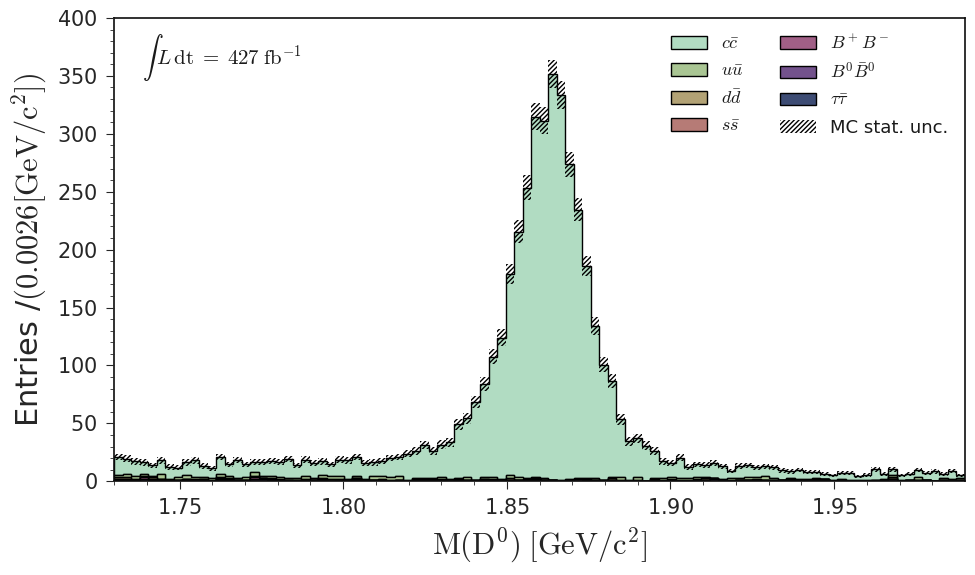

In [25]:
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.73,1.99)
nbins = 100
xlabel = "$\mathrm{M(D^0)}$"

# img_path = plot_directory + "/MC15ri_D0etaeta_gpi_tag_pre_sel_D0M_step0.png"
img_path = plot_directory + "/MC15ri_D0etaeta_gpi_tag_tight_selv1_D0M_step0.png"
img_path = plot_directory + "/MC15ri_D0etaeta_gpi_tag_tight_v3_D0M.png"

# img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

[ 194.  246.  262.  313.  345.  362.  405.  490.  521.  558.  624.  837.
 1889. 4023. 2343. 1074.  716.  639.  630.  622.  595.  602.  560.  577.
  583.  569.  567.  576.  580.  567.  528.  556.  552.  550.  565.  573.
  537.  546.  582.  556.  562.  548.  553.  552.  552.  597.  580.  627.
  587.  596.]
fitst_bin_entries=194.0


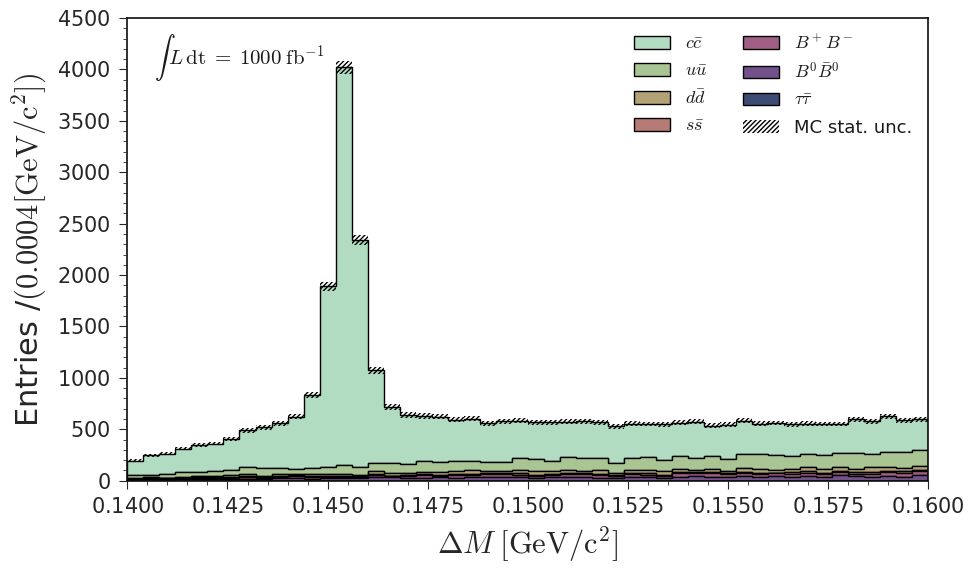

In [17]:
var = 'Dstarp_delM'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (0.140,0.16)
nbins = 50
xlabel = "$\Delta M$"

# img_path = plot_directory + "/MC15ri_D0etaeta_gpi_tag_pre_sel_Dstarp_delM_step0.png"
img_path = plot_directory + "/MC15ri_D0etaeta_gpi_tag_tight_selv1_Dstarp_delM_step0.png"

# img_path = plot_directory + "/test.png"

# plt.xticks(fontsize=12)
wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

In [104]:
cut = 'D0_M>0.0'
cut += '& gpi_eta_Pi0_M>0.12 & abs(gpi_eta_Pi0_daughterDiffOfPhi_0_1)<1.5 & gpi_eta_Pi0_daughterAngle_0_1<1.4'
# cut += '& dM_pi0_75MeV>0.011 & dM_pi0_75MeV_2>0.011'

# cut += ' & Eta_1_M>0.'
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

[31998. 31535. 30634. 29500. 29052. 28458. 27844. 26971. 26532. 25723.
 25172. 24510. 23922. 23465. 22518. 22282. 21544. 20975. 20588. 20421.
 19988. 19716. 19699. 19702. 19773. 19235. 18751. 17785. 16584. 15723.
 15028. 14468. 14157. 13278. 13302. 12596. 12485. 12275. 11824. 11381.
 11413. 11070. 10547. 10376. 10219.  9834.  9679.  9375.  9070.  9087.]
fitst_bin_entries=31998.0


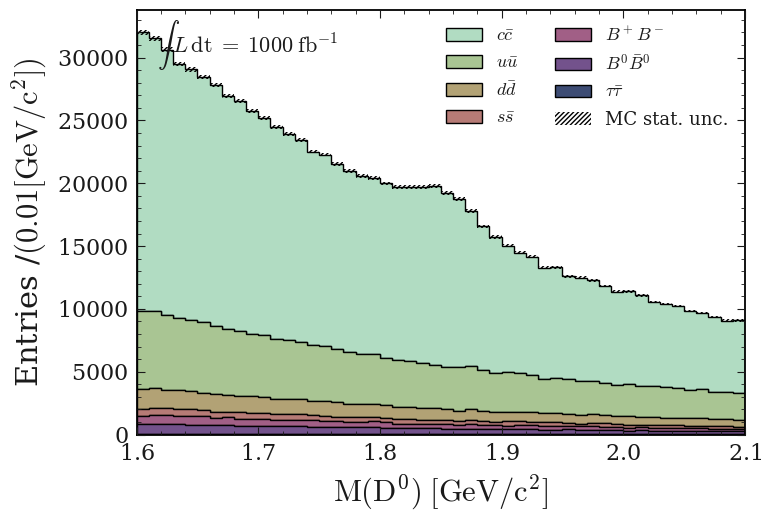

In [105]:
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.6,2.1)
nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

img_path = plot_directory + "/MC15ri_D0etaeta_gpi_tag_pre_sel_D0M_step1.png"
# img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

[ 6445.  8467.  9781. 11216. 12217. 13025. 13823. 14913. 15565. 16412.
 17077. 18277. 20894. 23431. 22031. 20072. 19505. 19265. 19530. 19375.
 19742. 19451. 19707. 19804. 20012. 19818. 19826. 20138. 20121. 20009.
 20161. 20253. 20232. 20235. 20221. 20282. 20340. 20175. 20263. 20277.
 20283. 20546. 20291. 20200. 20530. 20531. 20773. 20846. 20753. 20855.]
fitst_bin_entries=6445.0


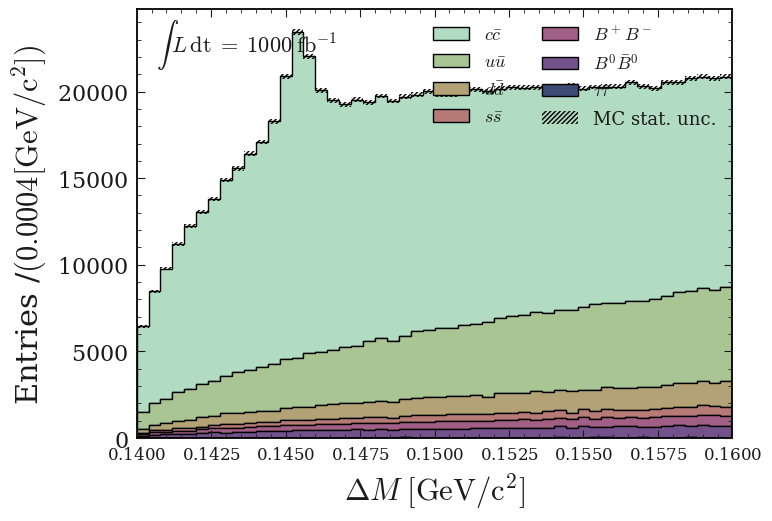

In [106]:
var = 'Dstarp_delM'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (0.140,0.16)
nbins = 50
xlabel = "$\Delta M$"

img_path = plot_directory + "/MC15ri_D0etaeta_gpi_tag_pre_sel_Dstarp_delM_step1.png"
# img_path = plot_directory + "/test.png"

plt.xticks(fontsize=12)
wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

In [107]:
cut = 'D0_M>0.0'
cut += '& abs(Eta_1_daughterDiffOfPhi_0_1)<2 & Eta_1_daughterAngle_0_1<1.7'
# cut += '& dM_pi0_75MeV>0.011 & dM_pi0_75MeV_2>0.011'
# cut += ' & Eta_1_M>0.'
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

[10170.  9992.  9455.  9009.  8859.  8538.  8192.  7956.  7557.  7381.
  7262.  6922.  6693.  6498.  6281.  6119.  5935.  5812.  5558.  5613.
  5518.  5747.  5870.  6057.  6464.  6333.  5949.  5407.  4810.  4101.
  3798.  3645.  3436.  3157.  3089.  2955.  2875.  2854.  2707.  2593.
  2616.  2464.  2398.  2298.  2245.  2170.  2142.  1978.  1997.  1951.]
fitst_bin_entries=10170.0


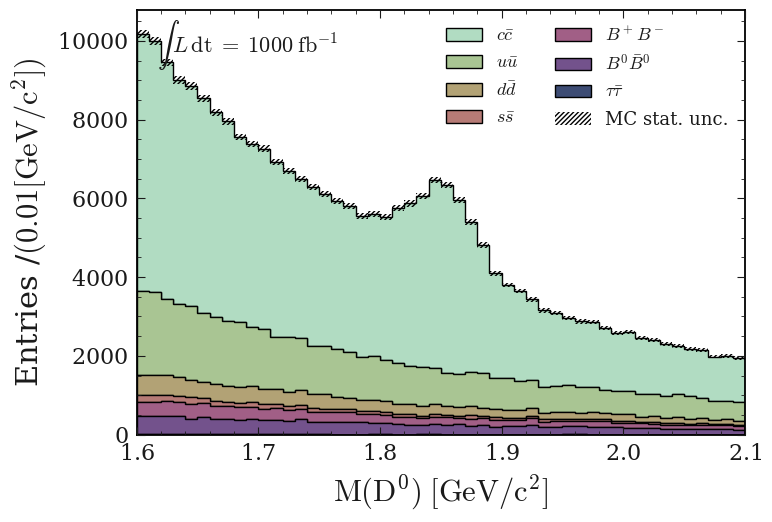

In [108]:
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.6,2.1)
nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

img_path = plot_directory + "/MC15ri_D0etaeta_gpi_tag_pre_sel_D0M_step2.png"
# img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

[1586. 2130. 2428. 2910. 3202. 3512. 3731. 4104. 4330. 4679. 5046. 5694.
 7492. 9795. 8158. 6464. 5850. 5601. 5503. 5411. 5400. 5194. 5187. 5418.
 5315. 5359. 5121. 5285. 5345. 5259. 5302. 5389. 5405. 5312. 5366. 5300.
 5427. 5299. 5281. 5467. 5473. 5400. 5333. 5223. 5465. 5459. 5479. 5507.
 5515. 5514.]
fitst_bin_entries=1586.0


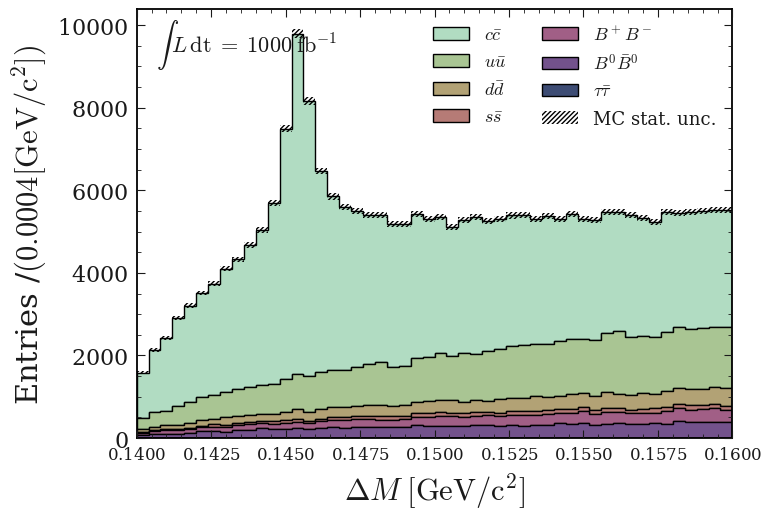

In [109]:
var = 'Dstarp_delM'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (0.140,0.16)
nbins = 50
xlabel = "$\Delta M$"

img_path = plot_directory + "/MC15ri_D0etaeta_gpi_tag_pre_sel_Dstarp_delM_step2.png"
# img_path = plot_directory + "/test.png"

plt.xticks(fontsize=12)
wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

In [110]:
cut = 'D0_M>0.0'
# cut += '& abs(Eta_1_daughterDiffOfPhi_0_1)<2 & Eta_1_daughterAngle_0_1<1.7'
cut += '& dM_pi0_75MeV>0.011 & dM_pi0_75MeV_2>0.011'
# cut += ' & Eta_1_M>0.'
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

[3862. 3724. 3570. 3405. 3332. 3186. 3071. 2998. 2826. 2796. 2783. 2669.
 2548. 2510. 2449. 2361. 2323. 2391. 2233. 2360. 2386. 2679. 2828. 3078.
 3466. 3477. 3194. 2795. 2276. 1881. 1591. 1507. 1429. 1271. 1231. 1225.
 1159. 1156. 1071. 1005. 1060. 1037.  964.  912.  957.  886.  811.  816.
  800.  769.]
fitst_bin_entries=3862.0


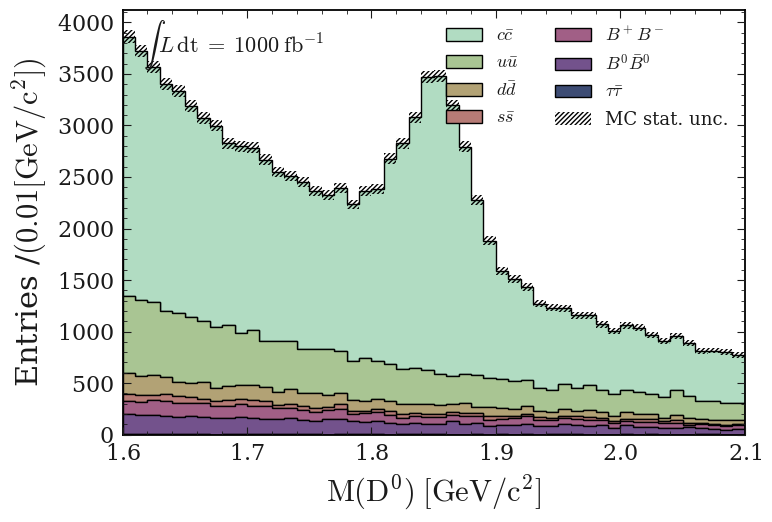

In [111]:
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.6,2.1)
nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

img_path = plot_directory + "/MC15ri_D0etaeta_gpi_tag_pre_sel_D0M_step3.png"
# img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

[ 612.  854.  964. 1096. 1262. 1410. 1484. 1654. 1811. 2002. 2203. 2661.
 4070. 5983. 4651. 3120. 2605. 2440. 2285. 2174. 2171. 2084. 2088. 2143.
 2043. 2072. 1974. 2020. 2056. 1995. 2062. 2096. 2080. 1990. 2038. 1971.
 2013. 1948. 1941. 2023. 2048. 1995. 2013. 2067. 2061. 2064. 2126. 2107.
 2067. 2050.]
fitst_bin_entries=612.0


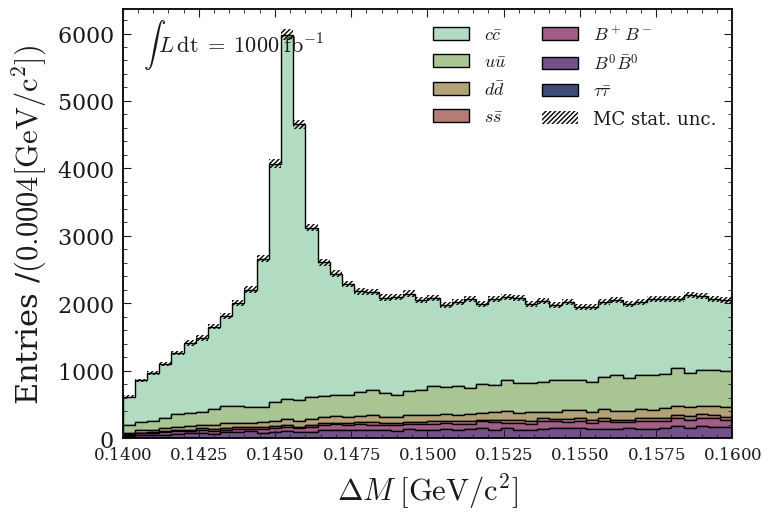

In [112]:
var = 'Dstarp_delM'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (0.140,0.16)
nbins = 50
xlabel = "$\Delta M$"

img_path = plot_directory + "/MC15ri_D0etaeta_gpi_tag_pre_sel_Dstarp_delM_step3.png"
# img_path = plot_directory + "/test.png"

plt.xticks(fontsize=12)
wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)